# Micro 110 Spring 2024 Python Demonstration

# Swiss Chocolate Tasting

## 8 volunteers 
## Rate each chocolate from 0-10

In [10]:
import numpy as np # this line imports a math library #


a=np.array([5,3,6,6,4,8,7,4])
b=np.array([8,4,7,3,7,3,6,4])
meana=np.sum(a)/8
stddeva=np.std(a,ddof=1)
meanb=np.sum(b)/8                         ### Calculate avg and std dev
stddevb=np.std(b,ddof=1)
binrange=[0,1,2,3,4,5,6,7,8,9,10,11]
binrangedist=[0,.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5]

# Let's see which chocolate students preferred

In [11]:
chocolateA=0
chocolateB=0
tie = 0 
for chocolatecount in range(b.size):
    if b[chocolatecount]>a[chocolatecount]:
        chocolateB=chocolateB+1
    if a[chocolatecount]>b[chocolatecount]:
        chocolateA=chocolateA+1
    if a[chocolatecount]==b[chocolatecount]:
        tie = tie+1
print(chocolateA,'out of 8 Micro-110 students prefer chocolate A')
print(chocolateB,'out of 8 Micro-110 students prefer chocolate B')
print(tie,'tie was counted')
print(meana,'was the average rating for chocolate A')
print(meanb,'was the average rating for chocolate B')

3 out of 8 Micro-110 students prefer chocolate A
4 out of 8 Micro-110 students prefer chocolate B
1 tie was counted
5.375 was the average rating for chocolate A
5.25 was the average rating for chocolate B


## Let's compare the chocolate ratings. 

## First, we will use a histogram bar chart. 
## The height of the bar indicates how many students responded with a chocolate rating between the lower and upper bounds of the bin.

Distribution of Chocolate A Taste Ratings


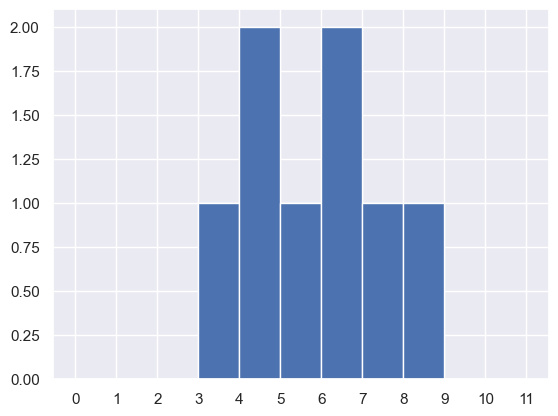

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns                       #### Import plotting library and format plots
sns.set(color_codes = True)
     
print('Distribution of Chocolate A Taste Ratings')
count, bins, ignored = plt.hist(a, bins=binrange, stacked=True)
#count, bins, ignored = plt.hist(b, bins=binrange, stacked=True)
#tick_locations = [-3, -2, -1, 0, 1, 2, 3]
plt.xticks(binrange)
plt.show()

##  Next, we will try to predict how the entire campus would respond based on how the students in this room responded. 

## We use the mean and standard deviation of the given responses to generate a normal distribution. 

## For now, think of this normal distribution as a prediction of how the roughly 10000 students on EPFL campus would describe chocolate A.

predicted distribution A


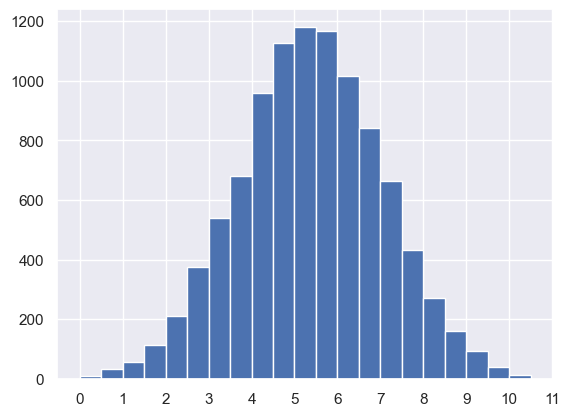

In [22]:
mu=meana
sigma=stddeva
s = np.random.normal(mu, sigma, 10000)
print('predicted distribution A')

count, bins, ignored = plt.hist(s, bins=binrangedist)
plt.xticks(binrange)
plt.show()

## We repeat this process for chocolate B.

Distribution of Chocolate B Taste


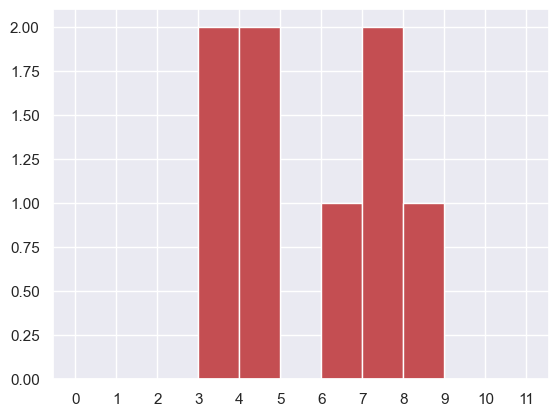

In [23]:

print('Distribution of Chocolate B Taste')
count, bins, ignored = plt.hist(b, bins=binrange, stacked=True, color="r")
plt.xticks(binrange)
plt.show()

predicted distribution B


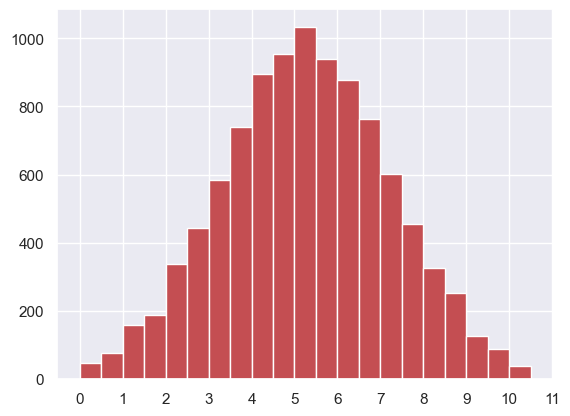

In [24]:
mu=meanb
sigma=stddevb
s = np.random.normal(mu, sigma, 10000)
print('predicted distribution B')

count, bins, ignored = plt.hist(s, bins=binrangedist, color="r")
plt.xticks(binrange)
plt.show()

## Next, we compare chocolate A's distribution with chocolate B's distribution. 
## Chocolate A is blue. Chocolate B is red.

predicted distribution of A and B overlapped


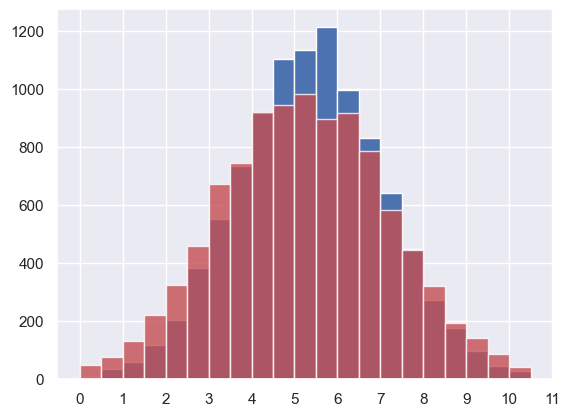

In [25]:
mu=meana
sigma=stddeva
s = np.random.normal(mu, sigma, 10000)
print('predicted distribution of A and B overlapped')

count, bins, ignored = plt.hist(s, bins=binrangedist)

mu=meanb
sigma=stddevb
s = np.random.normal(mu, sigma, 10000)


count, bins, ignored = plt.hist(s, bins=binrangedist, alpha=.8, color="r")
plt.xticks(binrange)
plt.show()

## The last question we will attempt to answer today is: 
## "Does one of these chocolates taste significantly better than the other?" 
## We will do this using a T-test, something you will learn about later in this course.

In [29]:
sxasxb=((stddeva**2/8)+(stddevb**2/8))**(1/2)
tratio=(meanb-meana)/sxasxb
import scipy.stats                              ##### Import stat library to do t-test
statistic, pvalue=scipy.stats.ttest_ind(a,b)

print('the p-value for this experiment is:', pvalue)
print('')
print('as a reminder:')
print(chocolateA,'out of 8 Micro-110 students prefer brand A chocolate')
print(chocolateB,'out of 8 Micro-110 students prefer brand B chocolate')
print(tie,'tie was counted')
print(meana,'was the average rating for brand A chocolate')
print(meanb,'was the average rating for brand B chocolate')

the p-value for this experiment is: 0.8938326796456149

as a reminder:
3 out of 8 Micro-110 students prefer brand A chocolate
4 out of 8 Micro-110 students prefer brand B chocolate
1 tie was counted
5.375 was the average rating for brand A chocolate
5.25 was the average rating for brand B chocolate


## The p-value gives the probability that both chocolates are from the same population. 

## If it is high (>0.05 in this class), this could mean that the two chocolates are in fact the same, or that chocolate quality doesn't affect chocolate rating. 

## If the p-value is low (<0.05), this could mean the chocolates are of different quality or that you all think that the chocolates are of different quality. 

## What assumptions have we made in our chocolate experiment? Did we bias our results in any way?

## What are some other factors or responses we could use to improve this experiment?

## How could we redesign this experiment to improve the reliability of our results?